In [29]:
import pandas as pd
import numpy as np
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
archivo = '../data/raw/pluri_patients_2020.csv'
df = pd.read_csv(archivo, sep = ';', decimal = ",")

In [52]:
estancias=df.iloc[:,2:10]

estancias["hospitalizacion"]=df["n_hosp"].apply(lambda x: x>0)
estancias["urgencias"]=df["n_urg"].apply(lambda x: x>0)
estancias["estado_vital"]=df["estado_vital"].apply(lambda x: x=='vivo')
estancias.head()

,n_urg,n_hosp,n_cx,n_ce_med_general,n_ce_med_especializada,estancia_sala,estancia_uce,estancia_uci,hospitalizacion,urgencias,estado_vital
0,1,1,0,3,9,2,0,0,True,True,True
1,1,0,0,0,1,0,0,0,False,True,True
2,1,0,0,4,3,0,0,0,False,True,True
3,1,1,1,0,2,13,0,0,True,True,False
4,2,0,0,2,8,0,0,0,False,True,True


In [53]:
estancias.describe()


,n_urg,n_hosp,n_cx,n_ce_med_general,n_ce_med_especializada,estancia_sala,estancia_uce,estancia_uci
count,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000
mean,0.359826,0.585919,0.106877,1.360189,3.471239,1.700054,0.096171,0.142624
std,0.803064,1.745051,0.471713,1.906433,4.249889,5.522486,0.888220,1.526053
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000
max,9.000000,39.000000,11.000000,16.000000,39.000000,120.000000,23.000000,45.000000


In [44]:
estancias["hospitalizacion"].value_counts()

False    4298
True     1213
Name: hospitalizacion, dtype: int64

In [45]:
estancias["urgencias"].value_counts()

False    4204
True     1307
Name: urgencias, dtype: int64

In [54]:
estancias.corr()

,n_urg,n_hosp,n_cx,n_ce_med_general,n_ce_med_especializada,estancia_sala,estancia_uce,estancia_uci,hospitalizacion,urgencias,estado_vital
n_urg,1.000000,0.616465,0.206998,0.135109,0.149295,0.552120,0.190901,0.090214,0.630787,0.803665,-0.220056
n_hosp,0.616465,1.000000,0.298281,0.085973,0.100954,0.548560,0.317954,0.304257,0.632080,0.489275,-0.213720
n_cx,0.206998,0.298281,1.000000,0.072218,0.182096,0.341491,0.372239,0.174211,0.287249,0.205595,-0.050871
n_ce_med_general,0.135109,0.085973,0.072218,1.000000,0.348267,0.042568,0.003440,0.010972,0.103178,0.113516,0.117161
n_ce_med_especializada,0.149295,0.100954,0.182096,0.348267,1.000000,0.109071,0.043475,0.002591,0.151850,0.137644,0.096219
estancia_sala,0.552120,0.548560,0.341491,0.042568,0.109071,1.000000,0.182812,0.100391,0.559853,0.420896,-0.201124
estancia_uce,0.190901,0.317954,0.372239,0.003440,0.043475,0.182812,1.000000,0.177329,0.203830,0.133681,-0.078849
estancia_uci,0.090214,0.304257,0.174211,0.010972,0.002591,0.100391,0.177329,1.000000,0.170774,0.112555,-0.145156
hospitalizacion,0.630787,0.632080,0.287249,0.103178,0.151850,0.559853,0.203830,0.170774,1.000000,0.699477,-0.296758
urgencias,0.803665,0.489275,0.205595,0.113516,0.137644,0.420896,0.133681,0.112555,0.699477,1.000000,-0.238658


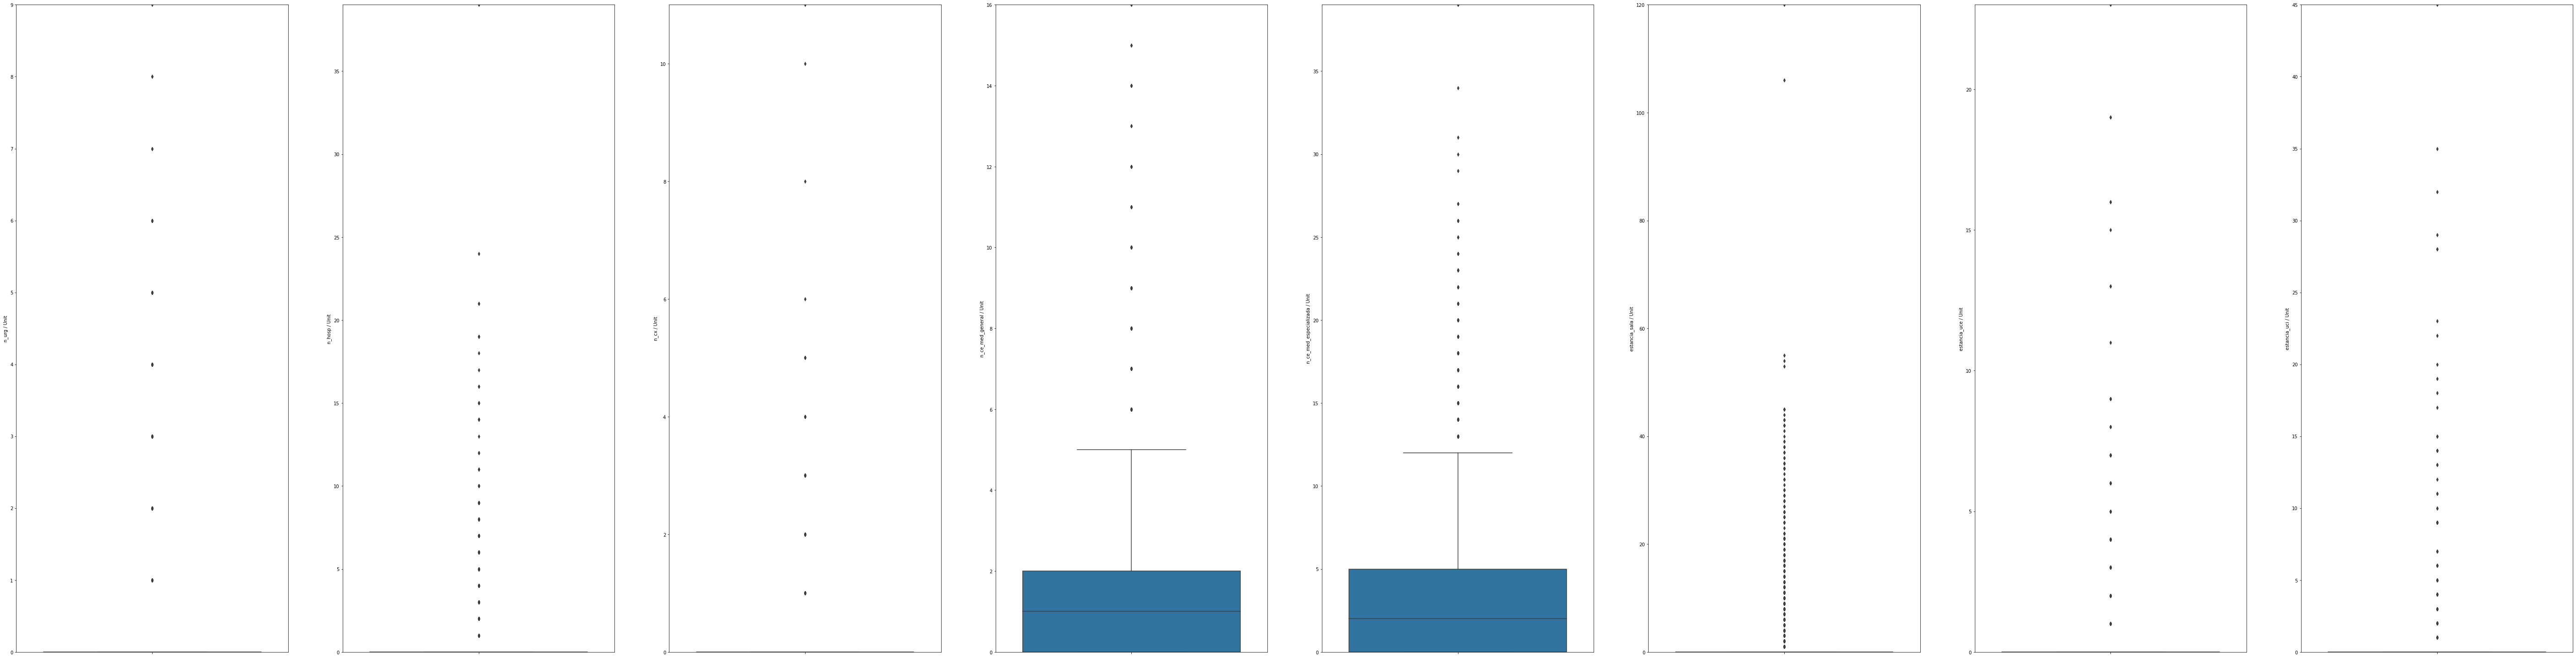

In [41]:
fig, axes = plt.subplots(1, estancias.shape[1]-3)
for i, col in enumerate(estancias.columns[:-3]):
    ax = sns.boxplot(y=estancias[col], ax=axes.flatten()[i])
    ax.set_ylim(estancias[col].min(), estancias[col].max())
    ax.set_ylabel(col + ' / Unit')
plt.rcParams['figure.figsize'] = (78,26)
plt.show()